In [210]:
import pandas as pd
import numpy as np

In [211]:
ctg = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Decision Tree\CTG.csv')

In [212]:
ctg.head()

,LB,AC,FM,NSP
0,120,0.000,0.0,2
1,132,0.006,0.0,1
2,133,0.003,0.0,1
3,134,0.003,0.0,1
4,132,0.007,0.0,1


In [213]:
ctg.shape


(2126, 4)

In [214]:
## CTG DESCRIPTION 

#LB : beats per second 
#AC : acceleration per second 
#FM : fetal movement per second 
#NSP (Normal , suspect, pathalogical) target variable
#       1         2         3(ill)

In [215]:
ctg.isnull().sum()

LB     0
AC     0
FM     0
NSP    0
dtype: int64

In [216]:
ctg.info()

# No data cleaning needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      2126 non-null   int64  
 1   AC      2126 non-null   float64
 2   FM      2126 non-null   float64
 3   NSP     2126 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 66.6 KB


In [217]:
from sklearn.model_selection import train_test_split

In [218]:
ctg_train, ctg_test = train_test_split(ctg, test_size= .2)

In [219]:
ctg_train_x = ctg_train.iloc[:, 0:-1]
ctg_train_y = ctg_train.iloc[:, -1]

ctg_test_x = ctg_test.iloc[:, 0:-1]
ctg_test_y = ctg_test.iloc[:, -1]

In [220]:
ctg.NSP.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [222]:
dt_ctg = DecisionTreeClassifier()

In [223]:
dt_ctg.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier()

In [224]:
pred_ctg = dt_ctg.predict(ctg_test_x)

In [225]:
tab_ctg = confusion_matrix(ctg_test_y, pred_ctg)
tab_ctg

array([[309,  19,   3],
       [ 26,  30,   4],
       [ 13,   5,  17]], dtype=int64)

In [226]:
print('Accuracy score is --> ', accuracy_score(ctg_test_y,pred_ctg)*100)

# From GINI - Decision Tree

Accuracy score is -->  83.56807511737088


In [227]:
dt_ctg1 = DecisionTreeClassifier( criterion= 'entropy')

# Try changing Hyperparameter one at a time , so that we can understand the difference in result by which parameter

In [228]:
dt_ctg1.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(criterion='entropy')

In [229]:
pred_ctg1 = dt_ctg1.predict(ctg_test_x)

In [230]:
tab_ctg1 = confusion_matrix(ctg_test_y, pred_ctg1)
tab_ctg1

array([[313,  16,   2],
       [ 28,  27,   5],
       [ 14,   4,  17]], dtype=int64)

In [231]:
print('Accuracy score is --> ', accuracy_score(ctg_test_y,pred_ctg1)*100)

# From Entropy - Decision Tree

Accuracy score is -->  83.80281690140845


In [232]:
# we see that GINI is giving better result, now we change another hyperparameter with GINI

dt_ctg2 = DecisionTreeClassifier( max_depth= 9)


In [233]:
dt_ctg2.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(max_depth=9)

In [234]:
pred_ctg2 = dt_ctg2.predict(ctg_test_x)

In [235]:
tab_ctg2 = confusion_matrix(ctg_test_y, pred_ctg2)
tab_ctg2

array([[304,  20,   7],
       [ 30,  25,   5],
       [ 17,   3,  15]], dtype=int64)

In [236]:
print('Accuracy score is --> ', accuracy_score(ctg_test_y,pred_ctg2)*100)

# From GINI - Decision Tree, max-depth = 9

Accuracy score is -->  80.75117370892019


In [237]:
# If you are a Dr and a pharma company show you these results. Should you use these tests on your patient
# If yes then why ? and if no then why?

  # Model is failing for class 2 and 3, which is unacceptable. Hence, we will reject the model
    
# Why is model failing for class 2 and 3?
  # Because of class imbalance

# Now we will add class 2 and class 3 in the original train data to solve class imbalance

In [238]:
df2 = ctg_train[ctg_train.NSP ==2]
df3 = ctg_train[ctg_train.NSP ==3]

In [239]:
ctg_train = pd.concat([ctg_train, df2, df3,df3])

# df3 is added twice because the value of class 3 is least which is 176 only in the entire data

In [240]:
ctg_train.NSP.value_counts()

# The value increases for class 2 and 3 now

1    1324
2     470
3     423
Name: NSP, dtype: int64

In [241]:
ctg_train_x = ctg_train.iloc[:, 0:-1]
ctg_train_y = ctg_train.iloc[:, -1]

ctg_test_x = ctg_test.iloc[:, 0:-1]
ctg_test_y = ctg_test.iloc[:, -1]

In [242]:
dt_ctg2 = DecisionTreeClassifier( max_depth= 9)


In [243]:
dt_ctg2.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(max_depth=9)

In [244]:
pred_ctg2 = dt_ctg2.predict(ctg_test_x)

In [245]:
tab_ctg2 = confusion_matrix(ctg_test_y, pred_ctg2)
tab_ctg2

array([[279,  34,  18],
       [ 13,  38,   9],
       [ 11,   4,  20]], dtype=int64)

In [246]:
# Now we can see the model has improved for class 2 and class 3 and is acceptable 

In [247]:
print('Accuracy score is --> ', accuracy_score(ctg_test_y,pred_ctg2)*100)

Accuracy score is -->  79.10798122065728


In [248]:
ctg = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Decision Tree\CTG.csv')

In [249]:
# another way to solve class imbalance problem is by

# --> dt_ctg2 = DecisionTreeClassifier(max_depth= 9, class_weight= 'balanced')


In [250]:
ctg_train, ctg_test = train_test_split(ctg, test_size= .2)

In [251]:
ctg_train_x = ctg_train.iloc[:, 0:-1]
ctg_train_y = ctg_train.iloc[:, -1]

ctg_test_x = ctg_test.iloc[:, 0:-1]
ctg_test_y = ctg_test.iloc[:, -1]

In [252]:
dt_ctg2 = DecisionTreeClassifier(max_depth= 9, class_weight= 'balanced')

In [253]:
dt_ctg2.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=9)

In [254]:
pred_ctg2 = dt_ctg2.predict(ctg_test_x)

In [255]:
tab_ctg2 = confusion_matrix(ctg_test_y, pred_ctg2)
tab_ctg2

array([[230,  54,  44],
       [  3,  50,   7],
       [  1,   8,  29]], dtype=int64)

In [256]:
print('Accuracy score is --> ', accuracy_score(ctg_test_y,pred_ctg2)*100)

Accuracy score is -->  72.53521126760563


In [257]:
# Although the accuracy has gone down, but is a better model then the result from class imbalance 

In [258]:
feature_imp = pd.DataFrame({'Feature': ctg_train_x.columns, 'Value': dt_ctg2.feature_importances_})
feature_imp

,Feature,Value
0,LB,0.526926
1,AC,0.282121
2,FM,0.190953


In [259]:
feature_imp.sort_values('Value', ascending= False)

,Feature,Value
0,LB,0.526926
1,AC,0.282121
2,FM,0.190953


In [260]:
ctg.head()

,LB,AC,FM,NSP
0,120,0.000,0.0,2
1,132,0.006,0.0,1
2,133,0.003,0.0,1
3,134,0.003,0.0,1
4,132,0.007,0.0,1


In [299]:
from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus
import pydot

from six import StringIO

In [195]:
ctg_train_x_names = ctg_train_x.columns

dot_data = StringIO()

In [196]:
dt = DecisionTreeClassifier(max_depth= 8)

In [197]:
dt.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(max_depth=8)

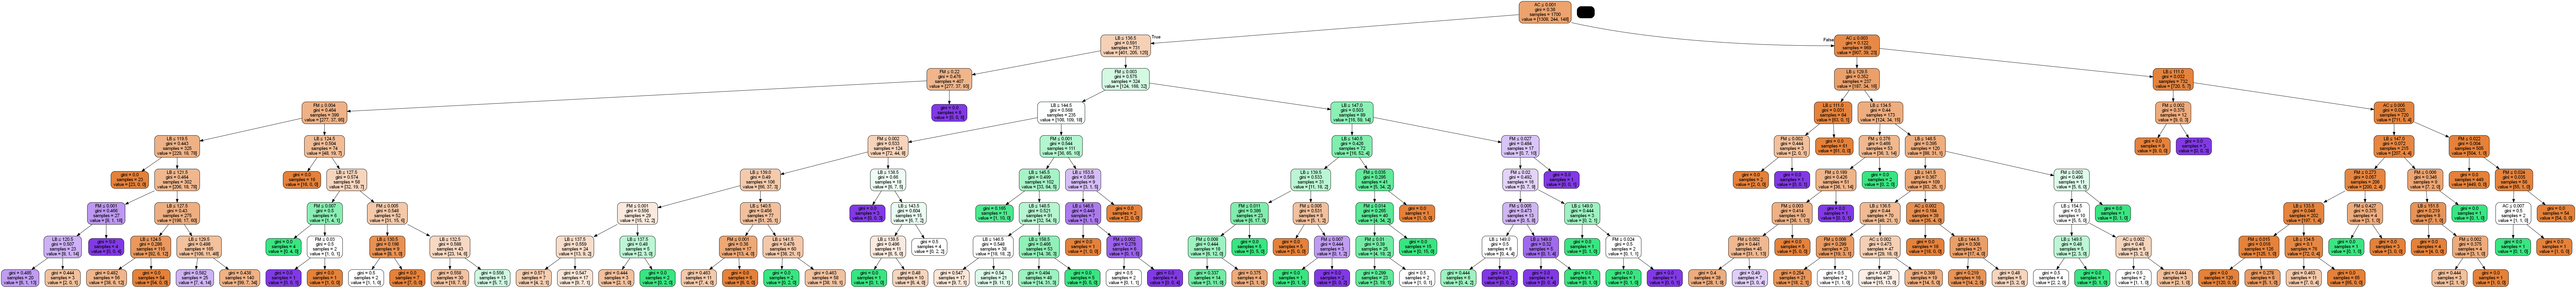

<Figure size 864x864 with 0 Axes>

In [198]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))

export_graphviz(dt, out_file= dot_data,
               filled= True, rounded= True,
               special_characters= True, feature_names= ctg_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [261]:
# Since, we put max_depth = 8, so we got this complicated tree 
# We will change max_depth = 4

dt = DecisionTreeClassifier(max_depth= 4)

In [262]:
dt.fit(ctg_train_x, ctg_train_y)

DecisionTreeClassifier(max_depth=4)

In [300]:

dot_data = StringIO()

# This has to be run again or else we will get an error


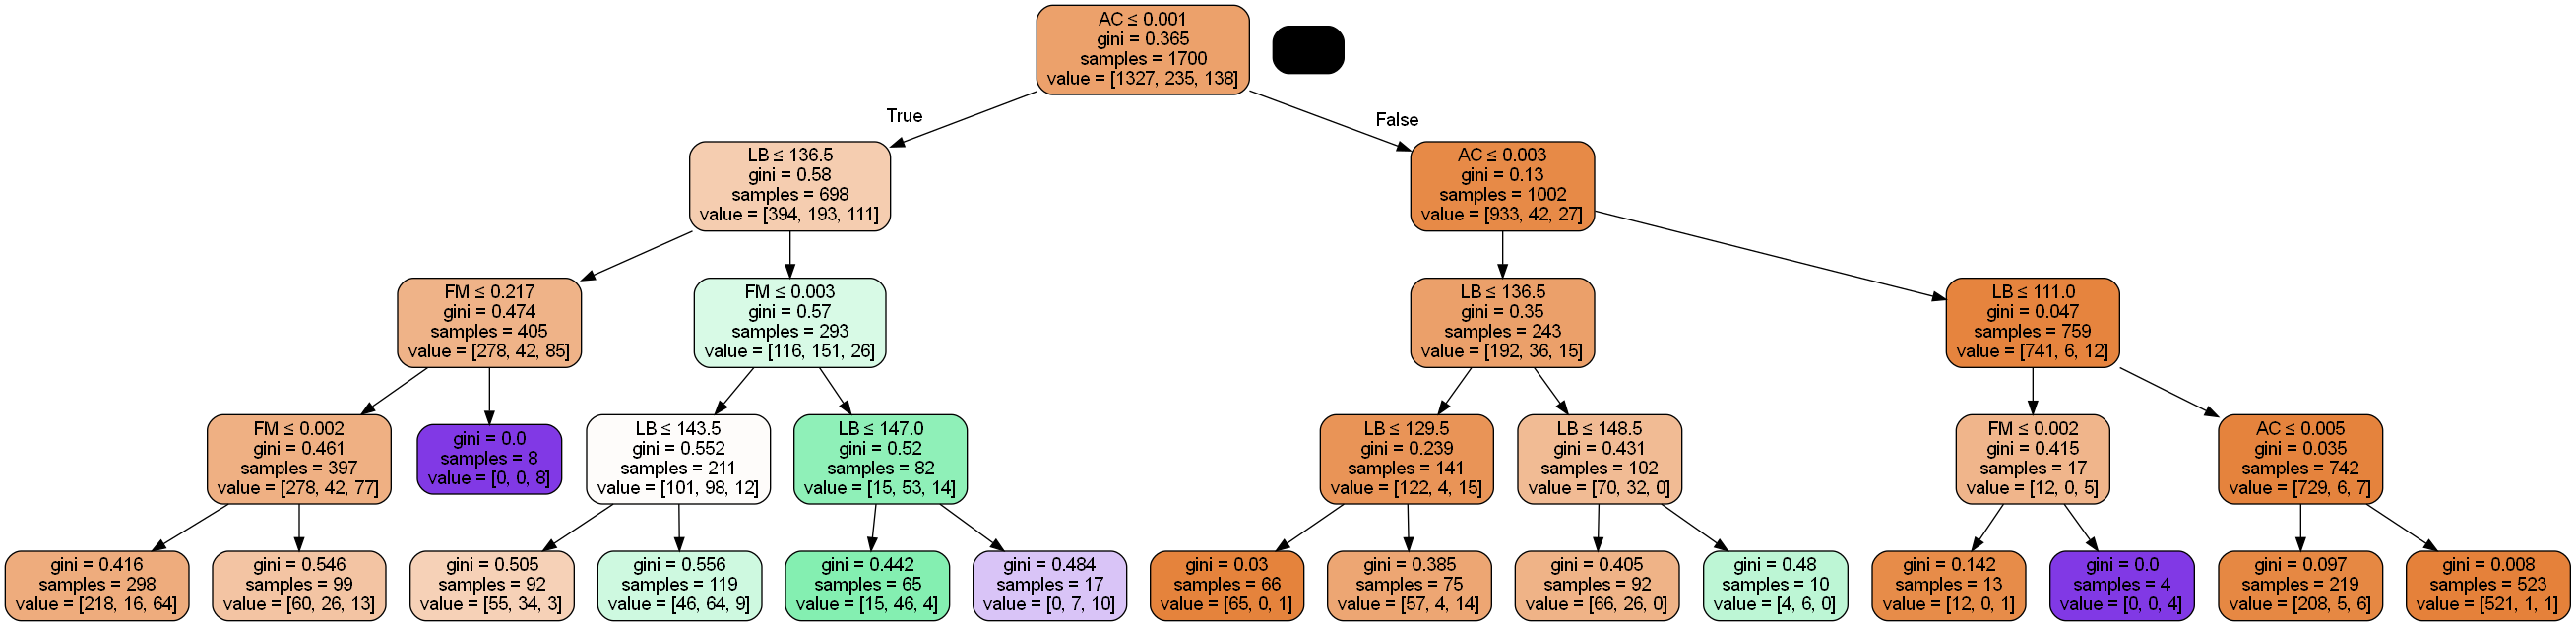

<Figure size 864x864 with 0 Axes>

In [302]:
dot_data = StringIO()
fig = plt.figure(figsize=(12,12))

export_graphviz(dt, out_file= dot_data,
                filled= True,rounded= True, 
                special_characters= True,feature_names= ctg_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# rounded = True will create the round shape edge of every square box
# filled= True, will fill the box with different colors , else you will get white color
# special_characters= True, some special character might be avoided, if not given
# feature_names= ctg_train_x.columns, will give the name of the column in every box

In [308]:
# Another way of plotting tree

In [309]:
# Hard-encoding
# Since, we have 3 categories in the y variable, we put cn = ['1','2' ,'3']
# If target variable has 2 categories like yes or no, then cn = ['1','2' ]

cn = ['1','2' ,'3']

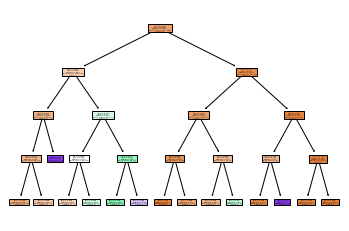

In [311]:
from sklearn import tree
tree.plot_tree(dt,
               feature_names = ctg_train_x_names, 
               class_names=cn,
               filled = True);
# fig.savefig('ctgtree.png') # Optional if you want to save the tree image

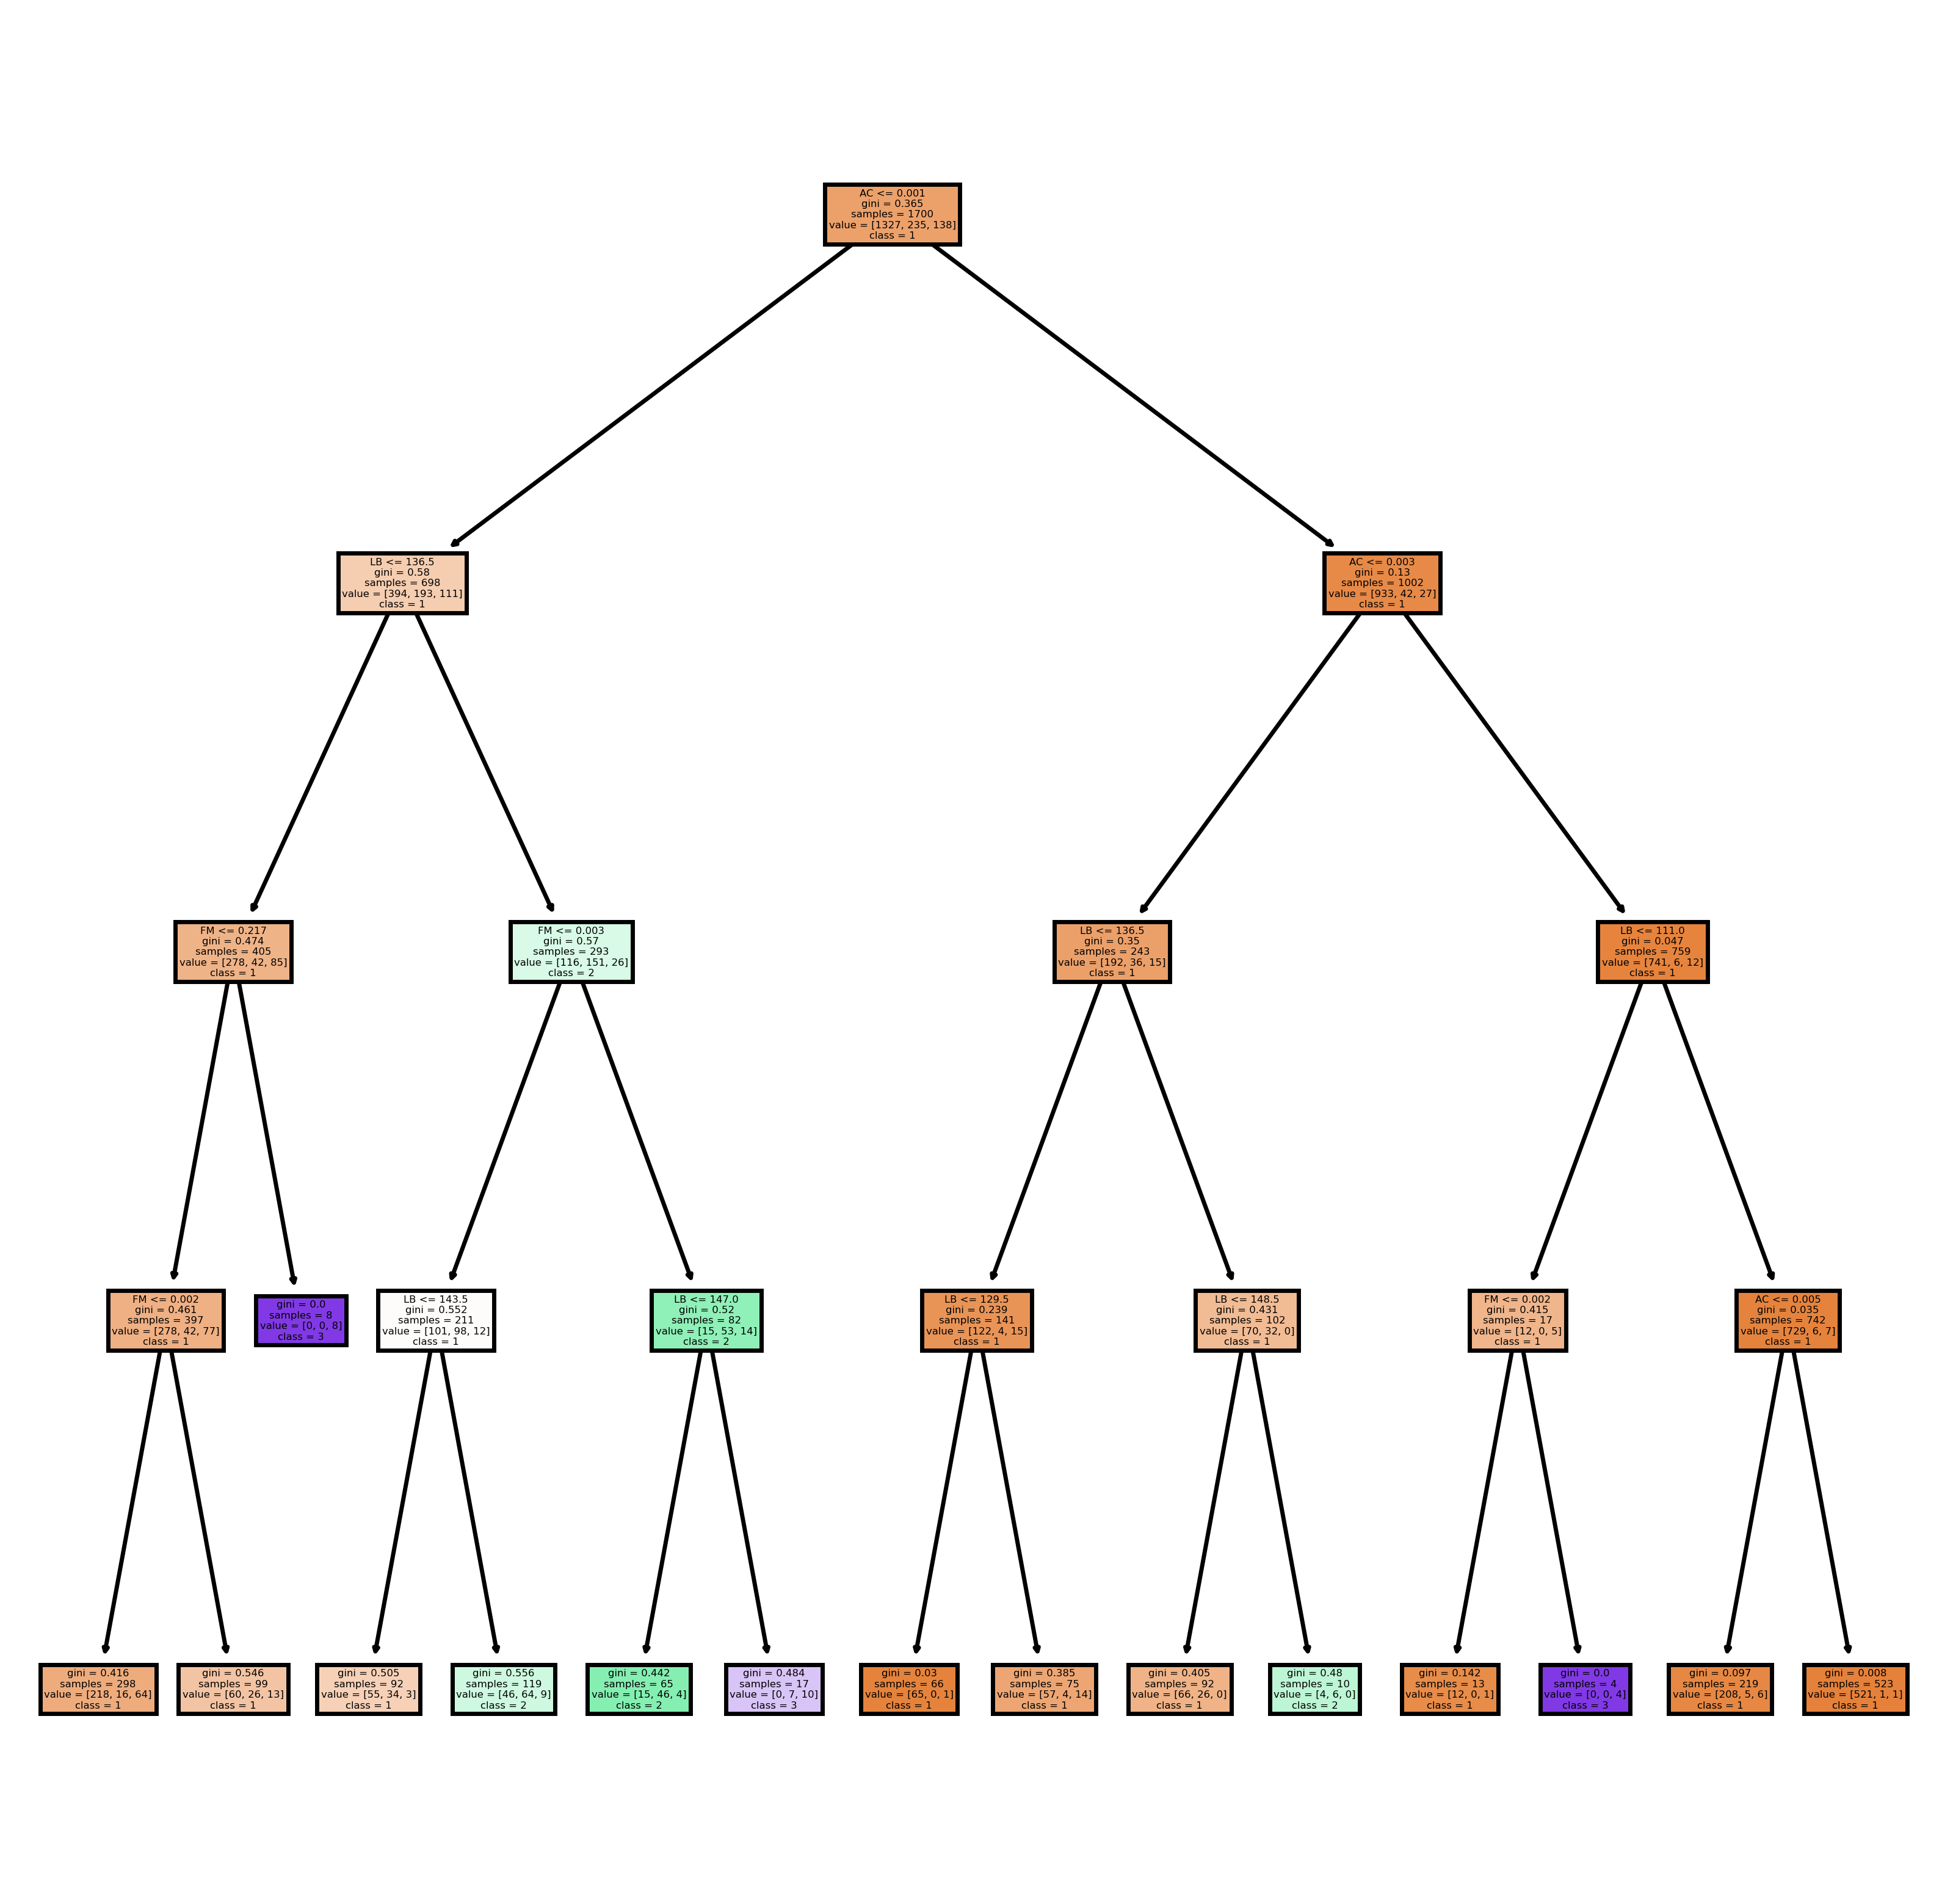

In [313]:
from sklearn import tree

fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(8,8), dpi= 500)
# This will enlarge the picture
tree.plot_tree(dt,
               feature_names = ctg_train_x_names, 
               class_names=cn,
               filled = True);
